In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from pykdf.kdf import save_kdf, load_kdf
from fakespikes.rates import bursts, boxcar
from fakespikes.neurons import Spikes
import fakespikes.util as sp
from copy import deepcopy
import numpy as np
from scipy import signal

import seaborn as sns
sns.set_style('ticks')

/home/ejp/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
a = load_kdf("../data/fig3/a.hdf5")
b = load_kdf("../data/fig3/b.hdf5")
c = load_kdf("../data/fig3/c.hdf5")

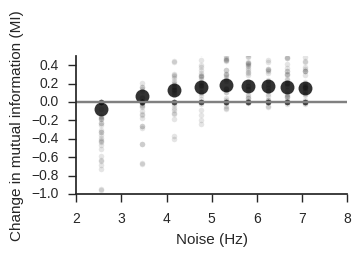

In [3]:
# -
# a - async pac
del_mi = a['del_mi']
sigmas = a['sigmas']

M = del_mi.mean(0)

n = del_mi.shape[0]

plt.figure(figsize=(3.5, 2))
for i, s in enumerate(sigmas[1:]):
    plt.plot([np.sqrt(s)] * n, del_mi[:, i], 'ok', alpha=0.1, markersize=4)
plt.plot(np.sqrt(sigmas[1:]), M[1:], 'ok', alpha=0.8, markersize=10)
plt.ylim(-1, 0.5)
plt.tight_layout()

plt.xlabel("Noise (Hz)")
plt.ylabel("Change in mutual information (MI)")
plt.axhline(y=0, color='grey')

sns.despine()

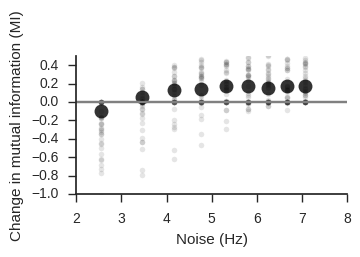

In [4]:
# -
# b - osc pac
del_mi = b['del_mi']
sigmas = b['sigmas']

M = del_mi.mean(0)

n = del_mi.shape[0]

plt.figure(figsize=(3.5, 2))
for i, s in enumerate(sigmas[1:]):
    plt.plot([np.sqrt(s)] * n, del_mi[:, i], 'ok', alpha=0.1, markersize=4)
plt.plot(np.sqrt(sigmas[1:]), M[1:], 'ok', alpha=0.8, markersize=10)
plt.ylim(-1, 0.5)
plt.tight_layout()

plt.xlabel("Noise (Hz)")
plt.ylabel("Change in mutual information (MI)")
plt.axhline(y=0, color='grey')

sns.despine()

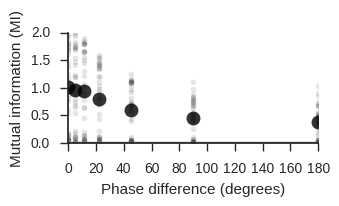

In [5]:
# -
# b - osc pac
del_mi = c['mi_phase']
phases = c['phases']

M = del_mi.mean(0)

plt.figure(figsize=(3.5, 2))
n = del_mi.shape[0]
for i, s in enumerate(phases):
    plt.plot([s] * n, del_mi[:, i], 'ok', alpha=0.1, markersize=4)
plt.plot(phases, M, 'ok', alpha=0.8, markersize=10)
plt.xlim(0, 180)
plt.ylim(0, 2)
plt.xlabel("Phase difference (degrees)")
plt.ylabel("Mutual information (MI)")
plt.axhline(y=0, color='grey')
plt.tight_layout()

sns.despine()

# Examples

In [6]:
%run /home/ejp/src/bluemass/bm.py ../data/fig3/ ../pars/test_asyncpac.yaml -t 2.0 --stim_seed 32 --sigma 20 --loc r_E

IOError: [Errno 2] No such file or directory: '../pars/test_asyncpac.yaml'

(1.1000000000000001, 1.7, 0.0, 25.0)

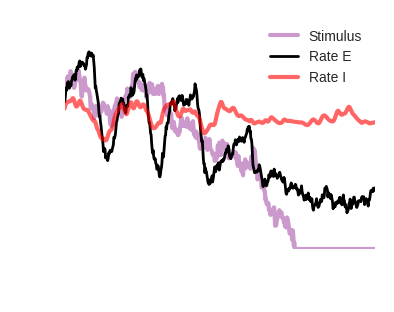

In [7]:
res = load_kdf("../data/fig3/result.hdf5")
idx = load_kdf("../data/fig3/index.hdf5")

ys = res['ys']
times = res['times']
stim = res['stims'][:,0]

# ignore eq time
drop_before = 0.5
ys = ys[times > drop_before, :]
stim = stim[times > drop_before]
times = times[times > drop_before]

re = ys[:, idx['r_E']]
ri = ys[:, idx['r_I']]

def norm(x):
    return (x - x.min()) / (x.max() - x.min())
    
# --
n = 100
plt.figure(figsize=(4 , 3))

plt.subplot(n + 11)
plt.plot(times, re.max() * (stim/stim.max()), color='purple',
         alpha=0.4, label='Stimulus', linewidth=3)
plt.plot(times, re, label='Rate E', color='k', linewidth=2)
plt.plot(times, ri, label='Rate I', color='r', alpha=0.6, linewidth=3)
plt.legend(loc='upper right', frameon=False)
plt.xlim(1.1, 1.7)
plt.xlabel("Time (s)")
plt.ylabel("Rate (Hz)")
plt.axis('off')

In [8]:
%run /home/ejp/src/bluemass/bm.py ../data/fig3/ ../pars/test_oscpac.yaml -t 2.0 --stim_seed 32 --sigma 20 --loc r_E

IOError: [Errno 2] No such file or directory: '../pars/test_oscpac.yaml'

(1.1000000000000001, 1.7, 0.0, 25.0)

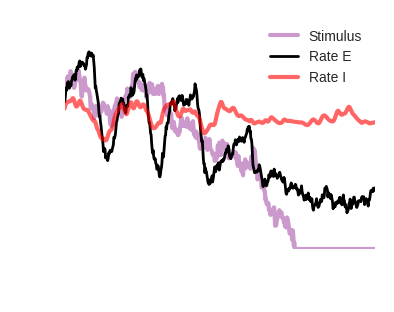

In [9]:
res = load_kdf("../data/fig3/result.hdf5")
idx = load_kdf("../data/fig3/index.hdf5")

ys = res['ys']
times = res['times']
stim = res['stims'][:,0]

# ignore eq time
drop_before = 0.5
ys = ys[times > drop_before, :]
stim = stim[times > drop_before]
times = times[times > drop_before]

re = ys[:, idx['r_E']]
ri = ys[:, idx['r_I']]

def norm(x):
    return (x - x.min()) / (x.max() - x.min())
    
# --
n = 100
plt.figure(figsize=(4 , 3))

plt.subplot(n + 11)
plt.plot(times, re.max() * (stim/stim.max()), color='purple',
         alpha=0.4, label='Stimulus', linewidth=3)
plt.plot(times, re, label='Rate E', color='k', linewidth=2)
plt.plot(times, ri, label='Rate I', color='r', alpha=0.6, linewidth=3)
plt.legend(loc='upper right', frameon=False)
plt.xlim(1.1, 1.7)
plt.xlabel("Time (s)")
plt.ylabel("Rate (Hz)")
plt.axis('off')

## Phase-phase

In [10]:
%run /home/ejp/src/bluemass/bm.py ../data/fig3/ ../pars/fig3/phase_diff_ph0.yaml -t 2.0 --stim_seed 32 --sigma 10 --loc r_E

IOError: [Errno 2] No such file or directory: '../pars/fig3/phase_diff_ph0.yaml'

In [11]:
res0 = load_kdf("../data/fig3/result.hdf5")
idx0 = load_kdf("../data/fig3/index.hdf5")

In [12]:
%run /home/ejp/src/bluemass/bm.py ../data/fig3/ ../pars/fig3/phase_diff_ph90.yaml -t 2.0 --stim_seed 32 --sigma 10 --loc r_E

IOError: [Errno 2] No such file or directory: '../pars/fig3/phase_diff_ph90.yaml'

In [13]:
res90 = load_kdf("../data/fig3/result.hdf5")
idx90 = load_kdf("../data/fig3/index.hdf5")

In [14]:
ys0 = res0['ys']
ys90 = res90['ys']
stim = res['stims'][:,0]
re0 = ys0[:, idx0['r_E']]
re90 = ys90[:, idx0['r_E']]

(0.20000000000000001, 1.0, -5.0, 35.0)

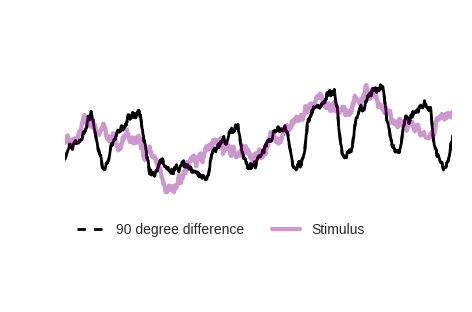

In [15]:
# --
n = 100
plt.figure(figsize=(5 , 3))

# plt.subplot(n + 11)
plt.plot(times, re0, label='', color='k', linewidth=2)
plt.plot(times, re90, label='90 degree difference', 
         color='k', linewidth=2, linestyle='--')
plt.plot(times, re.max() * (stim/stim.max()), 
         color='purple', label='Stimulus', linewidth=3, alpha=0.4)
plt.legend(loc='lower left', frameon=False, ncol=2)
plt.xlim(0.2, 1)
plt.ylim(-5, 35)
plt.xlabel("Time (s)")
plt.ylabel("Rate (Hz)")
plt.axis('off')

## Stim only

(0.20000000000000001, 1.0, -5.0, 35.0)

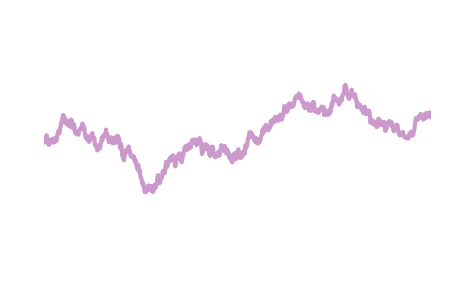

In [16]:
plt.figure(figsize=(5 , 3))
plt.plot(times, re.max() * (stim/stim.max()), 
         color='purple', label='Stimulus', linewidth=3, alpha=0.4)
plt.xlim(0.2, 1)
plt.ylim(-5, 35)
plt.axis('off')